<a href="https://colab.research.google.com/github/electrodrago/colab-learning/blob/main/5_data_augumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download dataset

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown --id 1Aw66uHqjgtLPTgkFHzPXW6AC-HAd_KyW

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=728ed926f64ad78ffb0174d2d9acc524d1921e9bed4884e1ac7e10fca4fb0b62
  Stored in directory: /tmp/pip-ephem-wheel-cache-ptx1d1u2/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Aw66uHqjgtLPTgkFHzPXW6AC-HAd_KyW
To: /content/cat_dog_data_augumentation.zip
100% 68.9M/68.9M [00:03<00:00, 20.3MB/s]


In [2]:
!unzip "/content/cat_dog_data_augumentation.zip" -d "/content"

Archive:  /content/cat_dog_data_augumentation.zip
   creating: /content/datasets/catsvsdogs/
   creating: /content/datasets/catsvsdogs/images/
  inflating: /content/datasets/catsvsdogs/images/cat.0.jpg  
  inflating: /content/datasets/catsvsdogs/images/cat.1.jpg  
  inflating: /content/datasets/catsvsdogs/images/cat.10.jpg  
  inflating: /content/datasets/catsvsdogs/images/cat.100.jpg  
  inflating: /content/datasets/catsvsdogs/images/cat.1000.jpg  
  inflating: /content/datasets/catsvsdogs/images/cat.1001.jpg  
  inflating: /content/datasets/catsvsdogs/images/cat.1002.jpg  
  inflating: /content/datasets/catsvsdogs/images/cat.1003.jpg  
  inflating: /content/datasets/catsvsdogs/images/cat.1004.jpg  
  inflating: /content/datasets/catsvsdogs/images/cat.1005.jpg  
  inflating: /content/datasets/catsvsdogs/images/cat.1006.jpg  
  inflating: /content/datasets/catsvsdogs/images/cat.1007.jpg  
  inflating: /content/datasets/catsvsdogs/images/cat.1008.jpg  
  inflating: /content/datasets/cat

# Define

In [3]:
from os import listdir
from os.path import isfile, join

mypath = "/content/datasets/catsvsdogs/images/"

file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]

print(str(len(file_names)) + ' images loaded')

3002 images loaded


In [4]:
import cv2
import numpy as np
import sys
import os
import shutil

dog_count = 0
cat_count = 0
train_size = 1000
test_size = 500
train_imgs = []
train_lbls = []
test_imgs = []
test_lbls = []
size = 150

dog_dir_train = "/content/datasets/catsvsdogs/train/dogs/"
cat_dir_train = "/content/datasets/catsvsdogs/train/cats/"
dog_dir_val = "/content/datasets/catsvsdogs/validation/dogs/"
cat_dir_val = "/content/datasets/catsvsdogs/validation/cats/"

def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)

make_dir(dog_dir_train)
make_dir(cat_dir_train)
make_dir(dog_dir_val)
make_dir(cat_dir_val)

def getZeros(number):
    if(number > 10 and number < 100):
        return "0"
    if(number < 10):
        return "00"
    else:
        return ""

for i, file in enumerate(file_names):
    
    if file_names[i][0] == "d":
        dog_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if dog_count <= train_size:
            train_imgs.append(image)
            train_lbls.append(1)
            zeros = getZeros(dog_count)
            cv2.imwrite(dog_dir_train + "dog" + str(zeros) + str(dog_count) + ".jpg", image)
        if dog_count > train_size and dog_count <= train_size + test_size:
            test_imgs.append(image)
            test_lbls.append(1)
            zeros = getZeros(dog_count-1000)
            cv2.imwrite(dog_dir_val + "dog" + str(zeros) + str(dog_count-1000) + ".jpg", image)
            
    if file_names[i][0] == "c":
        cat_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if cat_count <= train_size:
            train_imgs.append(image)
            train_lbls.append(0)
            zeros = getZeros(cat_count)
            cv2.imwrite(cat_dir_train + "cat" + str(zeros) + str(cat_count) + ".jpg", image)
        if cat_count > train_size and cat_count <= train_size + test_size:
            test_imgs.append(image)
            test_lbls.append(0)
            zeros = getZeros(cat_count-1000)
            cv2.imwrite(cat_dir_val + "cat" + str(zeros) + str(cat_count-1000) + ".jpg", image)

    if dog_count == train_size + test_size and cat_count == train_size + test_size:
        break



## Dump to npz file


In [5]:
np.savez('cats_vs_dogs_training_data.npz', np.array(train_imgs))
np.savez('cats_vs_dogs_training_labels.npz', np.array(train_lbls))
np.savez('cats_vs_dogs_test_data.npz', np.array(test_imgs))
np.savez('cats_vs_dogs_test_labels.npz', np.array(test_lbls))

## Now create function for loading

In [6]:
def load_data_training_and_test(datasetname):
    
    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']

    return (train, train_labels), (test, test_labels)

# Prepare dataset

In [7]:
(x_train, y_train), (x_test, y_test) = load_data_training_and_test("cats_vs_dogs")

# Reshaping our label data from (2000,) to (2000,1) and test data from (1000,) to (1000,1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

# Change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 150, 150, 3)
(2000, 1)
(1000, 150, 150, 3)
(1000, 1)


# Model

In [8]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 16
epochs = 25

img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [9]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

model.save("/content/cats_vs_dogs_V1.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/25
125/125 [==============================] - 67s 508ms/step - loss: 0.6984 - accuracy: 0.5315 - val_loss: 0.6786 - val_accuracy: 0.6250
Epoch 2/25
125/125 [==============================] - 60s 483ms/step - loss: 0.6733 - accuracy: 0.6245 - val_loss: 0.6319 - val_accuracy: 0.6630
Epoch 3/25
125/125 [==============================] - 58s 464ms/step - loss: 0.6151 - accuracy: 0.6790 - val_loss: 0.5942 - val_accuracy: 0.6820
Epoch 4/25
125/125 [==============================] - 59s 469ms/step - loss: 0.5732 - accuracy: 0.7025 - val_loss: 0.5853 - val_accuracy: 0.6810
Epoch 5/25
125/125 [==============================] - 58s 466ms/step - loss: 0.5294 - accuracy: 0.7450 - val_loss: 0.5866 - val_accuracy: 0.7020
Epoch 6/25
125/125 [==============================] - 58s 464ms/step - loss: 0.5064 - accuracy: 0.7650 - val_loss: 0.5576 - val_accuracy: 0.7220
Epoch 7/25
125/125 [==============================] - 58s 462ms/step - loss: 0.4505 - accuracy: 0.7865 - val_loss: 0.5452 - val_ac

# Plotting result

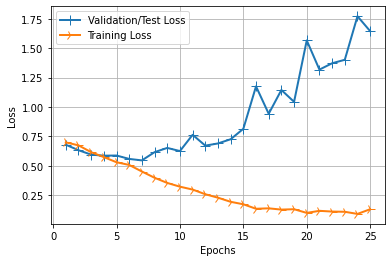

In [10]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

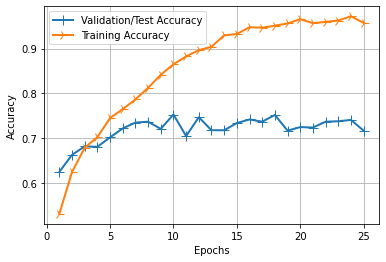

In [11]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Data Augumentation part

In [12]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

input_shape = (150, 150, 3)
img_width = 150
img_height = 150

nb_train_samples = 2000
nb_validation_samples = 1000
batch_size = 16
epochs = 25

train_data_dir = '/content/datasets/catsvsdogs/train'
validation_data_dir = '/content/datasets/catsvsdogs/validation'

# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 30,           # randomly applies rotations
      width_shift_range = 0.3,       # randomly applies width shifting
      height_shift_range = 0.3,      # randomly applies height shifting
      horizontal_flip = True,        # randonly flips the image
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = False)    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
# Creating out model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
125/125 [==============================] - 75s 587ms/step - loss: 0.7061 - accuracy: 0.5110 - val_loss: 0.6989 - val_accuracy: 0.4960
Epoch 2/25
125/125 [==============================] - 72s 572ms/step - loss: 0.6966 - accuracy: 0.5350 - val_loss: 0.7058 - val_accuracy: 0.5202
Epoch 3/25
125/125 [==============================] - 70s 558ms/step - loss: 0.6933 - accuracy: 0.5575 - val_loss: 0.6696 - val_accuracy: 0.6038
Epoch 4/25
125/125 [==============================] - 70s 559ms/step - loss: 0.6882 - accuracy: 0.5640 - val_loss: 0.6613 - val_accuracy: 0.5635
Epoch 5/25
125/125 [==============================] - 71s 564ms/step - loss: 0.6679 - accuracy: 0.6050 - val_loss: 0.6436 - val_accuracy: 0.6149
Epoch 6/25
125/125 [==============================] - 70s 561ms/step - loss: 0.6594 - accuracy: 0.6155 - val_loss: 0.6768 - val_accuracy: 0.5786
Epoch 7/25
125/125 [==============================] - 70s 560ms/step - loss: 0.6522 - accuracy: 0.6320 - val_loss: 0.6227 - val_ac

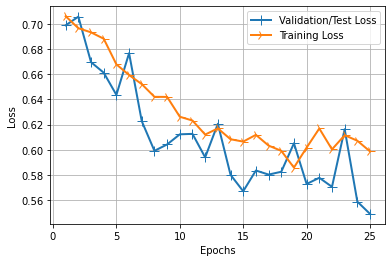

In [15]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

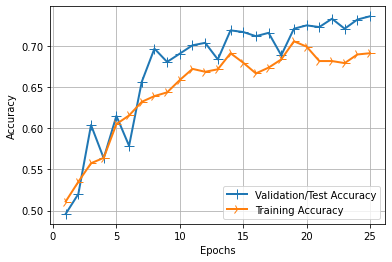

In [16]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()